In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

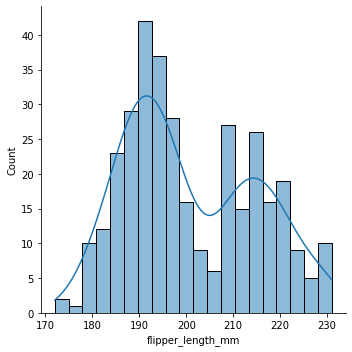

In [3]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm",kde=True, bins=20)

In [24]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [1]:
def plot_distribution(df_emp):
  fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(40, 20))

  for i, feature in enumerate(df_emp.columns):
      row = int(i/4)
      col = i%4
      print("row",row,"--",i)
      #pd.value_counts(df_emp.iloc[:, i]).plot.pie(autopct="%.1f%%", ax=axs[row][col])
      #sns.displot(penguins, x=feature, stat="density", common_norm=True,kde=True)
      #sns.distplot(penguins, kde = True, color ='red', bins = 30)


  plt.suptitle('Distribution of features Before Imputation')
  plt.tight_layout()

row 0 -- 0
row 0 -- 1
row 0 -- 2
row 0 -- 3
row 1 -- 4
row 1 -- 5
row 1 -- 6


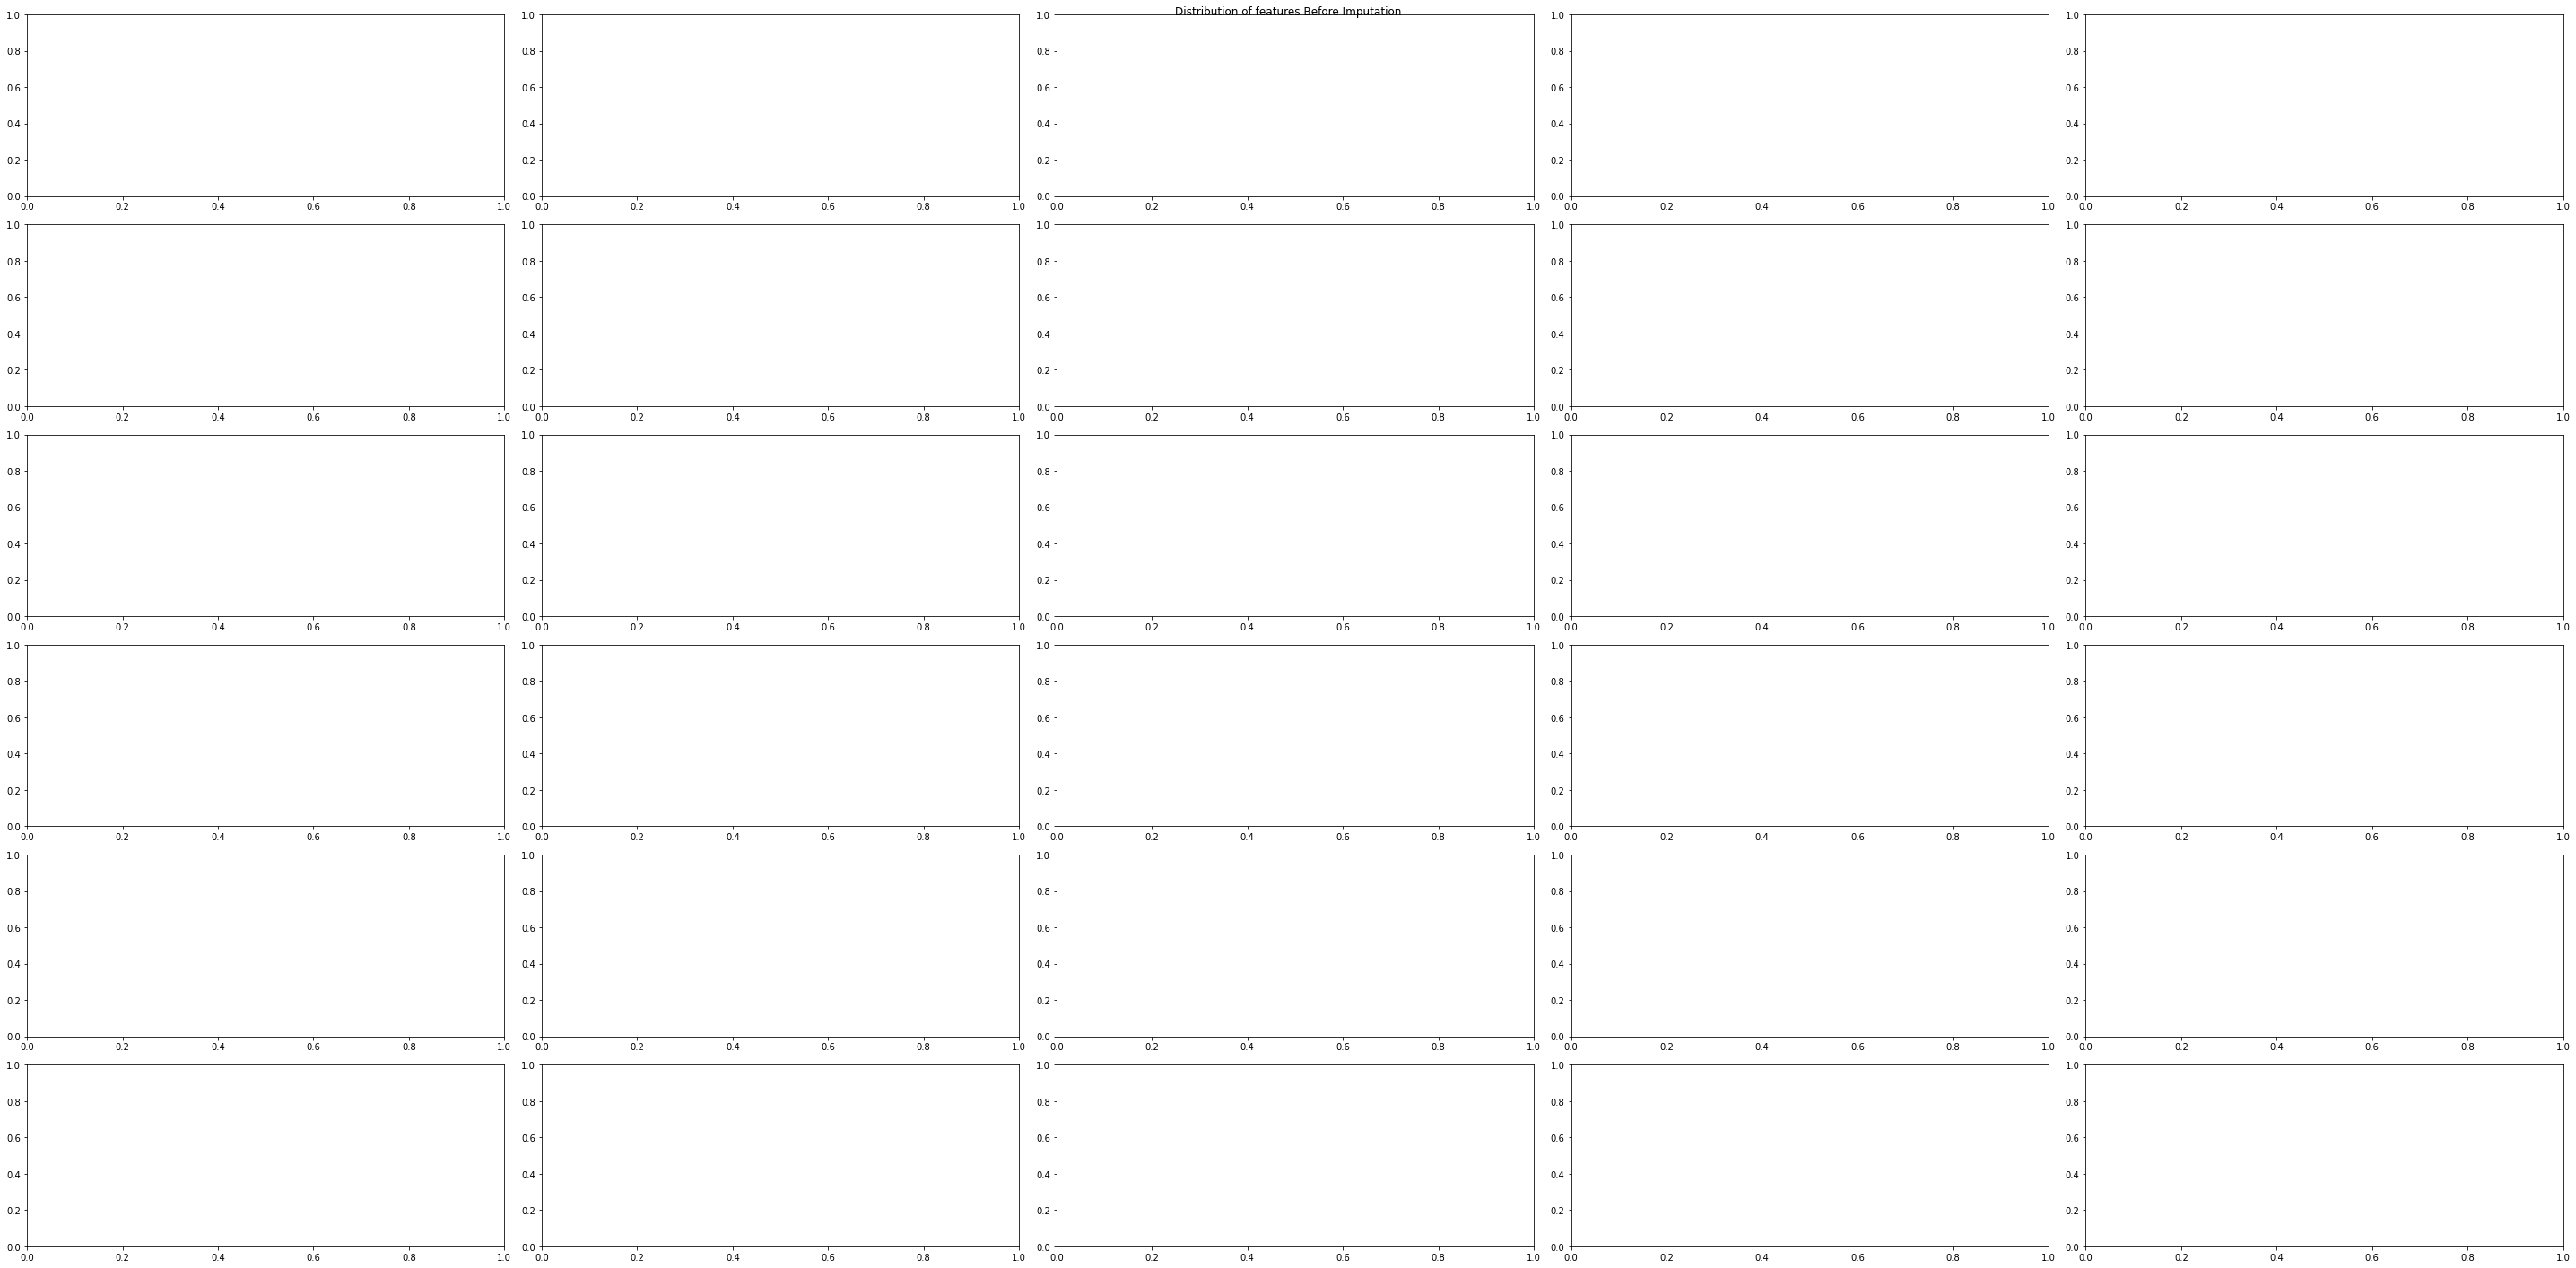

In [6]:
plot_distribution(penguins)

In [20]:
penguins.groupby("species").agg({"body_mass_g":["min","max","count","std","skew"]},{"sex":"count"})

,sex
species,
Adelie,146
Chinstrap,68
Gentoo,119


In [38]:
penguins["sex"]=penguins["sex"].map({'Male':1,'Female':0})


In [45]:
penguins["flipper_length_mm"].skew()

0.34568183286876963

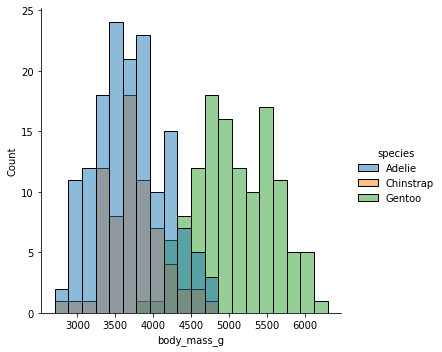

In [8]:
sns.displot(penguins, x="body_mass_g",kde=False, bins=20,hue="species")

<AxesSubplot:>

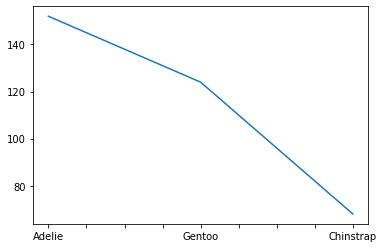

In [29]:
penguins['species'].value_counts().plot()

In [34]:
penguins[penguins['species']=='Gentoo'].sort_values(by="body_mass_g")[['species','body_mass_g']]

,species,body_mass_g
260,Gentoo,3950.0
246,Gentoo,4100.0
236,Gentoo,4150.0
280,Gentoo,4200.0
266,Gentoo,4200.0
...,...,...
337,Gentoo,6000.0
297,Gentoo,6000.0
253,Gentoo,6050.0
237,Gentoo,6300.0


In [5]:
penguins.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [3]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [13]:
penguins['species'].where((penguins['flipper_length_mm']>=192) & (penguins['flipper_length_mm']<200)).dropna().count()

78

0.34568183286876963

In [4]:
penguins['flipper_length_mm'].skew()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
